In [1]:
import pandas as pd
import numpy as np
r1 = pd.read_csv('results.csv')
r2 = pd.read_csv('results_2.csv')
r3 = pd.read_csv('results_3.csv')
r4 = pd.read_csv('results_4.csv')

pd.concat([r1, r2, r3, r4]).to_csv('results_all.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv('results_all.csv')
df = df.fillna('')
configs = pd.read_csv('configs_all.csv')
columns = ['datapath', 'n_features','embedding_dim','aggregator','n_layers','n_heads',
'reduce_type','learn_adjacency','tie_embeddings','tie_aggregator']
configs = configs.fillna('')

marged = pd.merge(df, configs, on = columns, how = 'left')
grouped = marged.groupby(columns)


def filter_and_average(group):
    filtered = group[group['step'] >= 1500]
    return pd.Series({
        'loss': filtered['loss'].mean(),
        'tvdist': filtered['tv_dist'].mean(),
        'tvdist_std': filtered['tv_dist'].std(),
        'cptsize': filtered['size_of_cpt'].mean(),
        'numparams': filtered['numparams'].mean()
    })

# Apply the function to each group and reset the index
result = grouped.apply(filter_and_average).reset_index()
print(result)

     datapath  n_features  embedding_dim   aggregator  n_layers  n_heads  \
0      data/0          10              2          mlp         1        1   
1      data/0          10              2          mlp         1        1   
2      data/0          10              2          mlp         1        1   
3      data/0          10              2          mlp         1        1   
4      data/0          10              2          mlp         1        1   
...       ...         ...            ...          ...       ...      ...   
3775   data/9         100             64  transformer         4        1   
3776   data/9         100             64  transformer         4        2   
3777   data/9         100             64  transformer         4        2   
3778   data/9         100             64  transformer         4        4   
3779   data/9         100             64  transformer         4        4   

     reduce_type learn_adjacency  tie_embeddings tie_aggregator      loss  \
0         

/tmp/ipykernel_3610295/1036606102.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = grouped.apply(filter_and_average).reset_index()


In [46]:
result[
    (result['aggregator'] == 'transformer') & 
                #   (result['n_features'] == 25) & 
                  (result['n_layers'] == 2)]

,datapath,n_features,embedding_dim,aggregator,n_layers,n_heads,reduce_type,learn_adjacency,tie_embeddings,tie_aggregator,loss,tvdist,tvdist_std,cptsize,numparams
64,data/0,10,2,transformer,2,1,,,False,,0.623387,0.103586,0.000295,62.0,156.0
65,data/0,10,2,transformer,2,1,,,True,,0.621756,0.104863,0.000269,62.0,102.0
66,data/0,10,2,transformer,2,2,,,False,,0.622471,0.103232,0.000253,62.0,156.0
67,data/0,10,2,transformer,2,2,,,True,,0.622222,0.106357,0.000391,62.0,102.0
162,data/0,10,4,transformer,2,1,,,False,,0.623314,0.102744,0.000342,62.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,data/9,100,64,transformer,2,1,,,True,,0.630908,0.210764,0.001243,4736.0,56640.0
3770,data/9,100,64,transformer,2,2,,,False,,0.182334,0.371023,0.008467,4736.0,75648.0
3771,data/9,100,64,transformer,2,2,,,True,,0.632474,0.211489,0.001279,4736.0,56640.0
3772,data/9,100,64,transformer,2,4,,,False,,0.030695,0.411272,0.006166,4736.0,75648.0


In [45]:
result[(result['aggregator']=='transformer') & (result['n_layers']==2)]

,datapath,n_features,embedding_dim,aggregator,n_layers,n_heads,reduce_type,learn_adjacency,tie_embeddings,tie_aggregator,loss,tvdist,tvdist_std,cptsize,numparams
64,data/0,10,2,transformer,2,1,,,False,,0.623387,0.103586,0.000295,62.0,156.0
65,data/0,10,2,transformer,2,1,,,True,,0.621756,0.104863,0.000269,62.0,102.0
66,data/0,10,2,transformer,2,2,,,False,,0.622471,0.103232,0.000253,62.0,156.0
67,data/0,10,2,transformer,2,2,,,True,,0.622222,0.106357,0.000391,62.0,102.0
162,data/0,10,4,transformer,2,1,,,False,,0.623314,0.102744,0.000342,62.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3769,data/9,100,64,transformer,2,1,,,True,,0.630908,0.210764,0.001243,4736.0,56640.0
3770,data/9,100,64,transformer,2,2,,,False,,0.182334,0.371023,0.008467,4736.0,75648.0
3771,data/9,100,64,transformer,2,2,,,True,,0.632474,0.211489,0.001279,4736.0,56640.0
3772,data/9,100,64,transformer,2,4,,,False,,0.030695,0.411272,0.006166,4736.0,75648.0


## Transformer No Tie N heads = 1

/tmp/ipykernel_3610295/2439585543.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


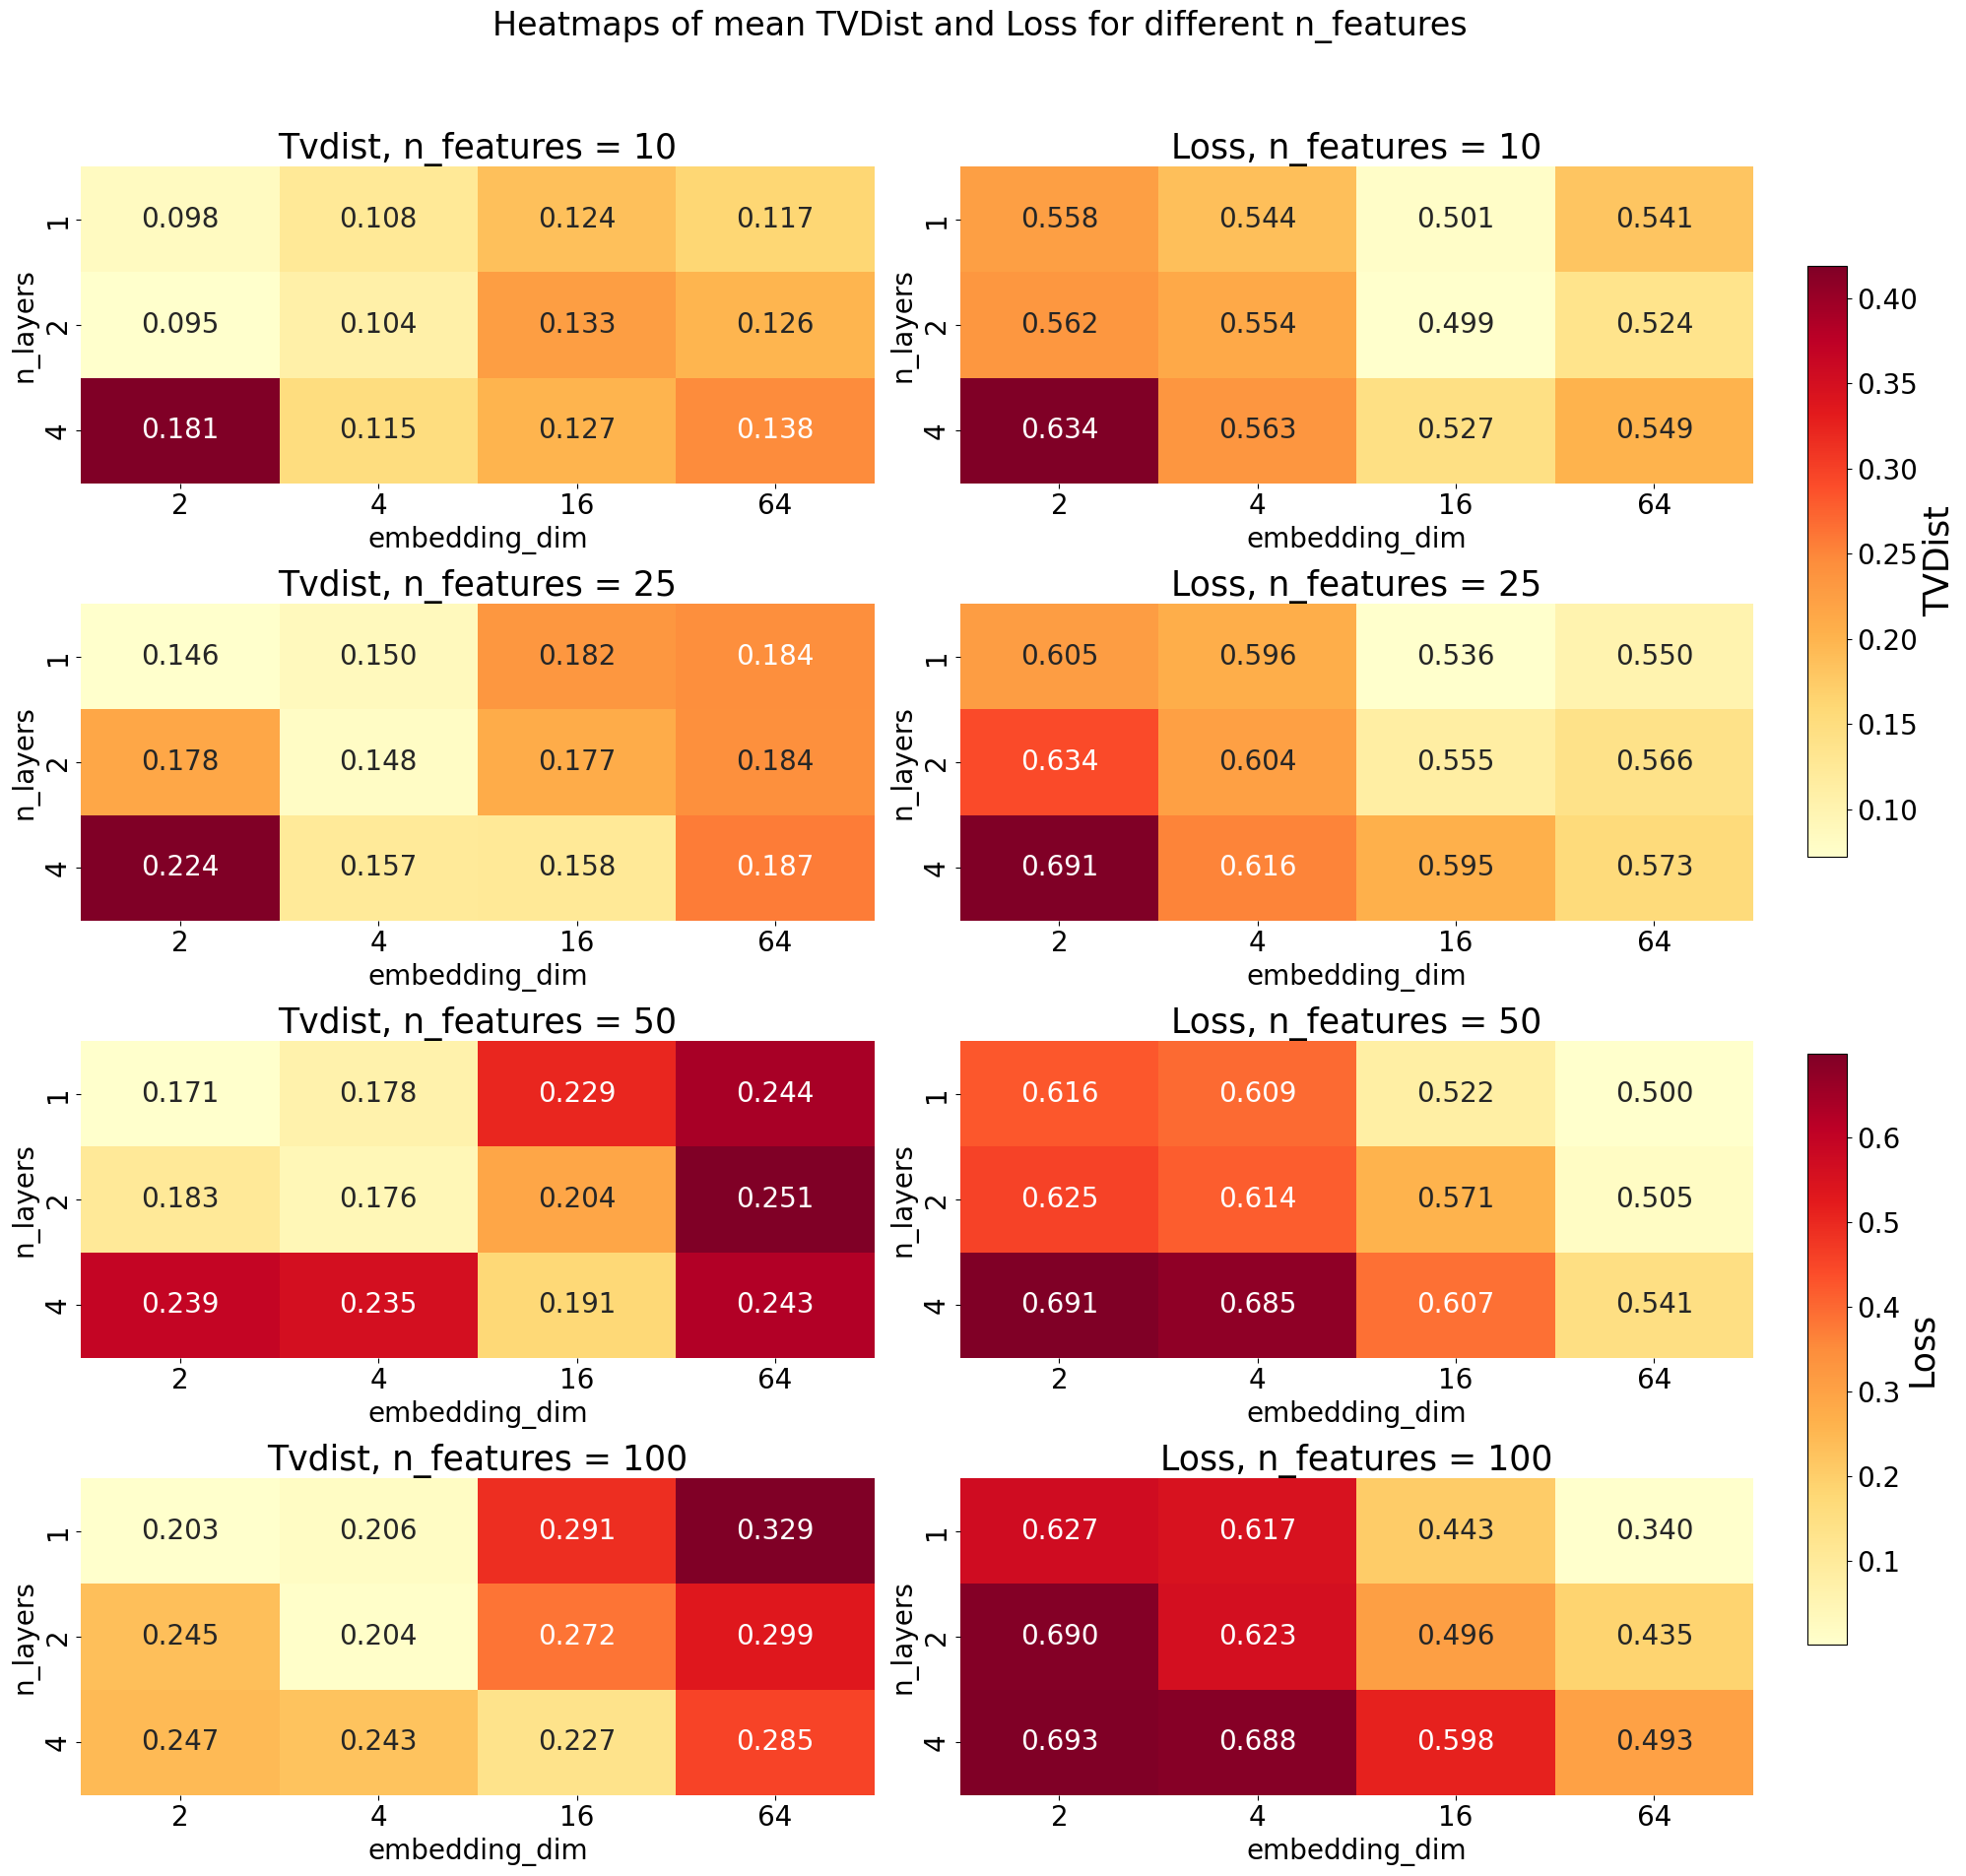

In [47]:
### Create Figure for Transformer with embeddings not Tied

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'result'
# If it's not, replace 'result' with your actual DataFrame name
fontsize=  25
def create_heatmap(data, ax, n_features, metric):
    pivot_data = data.pivot(index='n_layers', columns='embedding_dim', values=metric)
    sns.heatmap(pivot_data, ax=ax, cmap='YlOrRd', annot=True, fmt='.3f', cbar=False,
                annot_kws={'size': 20})  # Set font size for annotation
    ax.set_title(f'{metric.capitalize()}, n_features = {n_features}', fontsize=fontsize)
    ax.set_xlabel('embedding_dim', fontsize=20)
    ax.set_ylabel('n_layers', fontsize=20)
    ax.tick_params(labelsize=20)  # Set font size for tick labels

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('Heatmaps of mean TVDist and Loss for different n_features', fontsize=24)

n_features_values = [10, 25, 50, 100]

for i, n_features in enumerate(n_features_values):
    data = result[(result['aggregator'] == 'transformer') & 
                  (result['n_features'] == n_features) & 
                  (result['tie_embeddings'] == False) & 
                  (result['n_heads'] == 1)]
    
    grouped_data = data.groupby(['n_layers', 'embedding_dim', 'aggregator']).mean(['tvdist', 'loss']).reset_index()
    
    create_heatmap(grouped_data, axes[i, 0], n_features, 'tvdist')
    create_heatmap(grouped_data, axes[i, 1], n_features, 'loss')

# Find global min and max for consistent colorbar
vmin_tvdist = result['tvdist'].min()
vmax_tvdist = result['tvdist'].max()
vmin_loss = result['loss'].min()
vmax_loss = result['loss'].max()

# Add common colorbars
cbar_ax_tvdist = fig.add_axes([0.92, 0.55, 0.02, 0.3])
cbar_ax_loss = fig.add_axes([0.92, 0.15, 0.02, 0.3])

sm_tvdist = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_tvdist, vmax=vmax_tvdist))
sm_loss = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_loss, vmax=vmax_loss))

sm_tvdist.set_array([])
sm_loss.set_array([])

cbar_tvdist = fig.colorbar(sm_tvdist, cax=cbar_ax_tvdist)
cbar_loss = fig.colorbar(sm_loss, cax=cbar_ax_loss)

cbar_tvdist.set_label('TVDist', fontsize=fontsize)
cbar_loss.set_label('Loss', fontsize=fontsize)
cbar_tvdist.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks
cbar_loss.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])

# Add row labels for n_features
# for i, n_features in enumerate(n_features_values):
#     fig.text(0.08, 0.87 - i*0.22, f'n_features = {n_features}', fontsize=16, rotation=90, va='center')

plt.savefig('transformer_notie.pdf')

/tmp/ipykernel_3610295/642608122.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


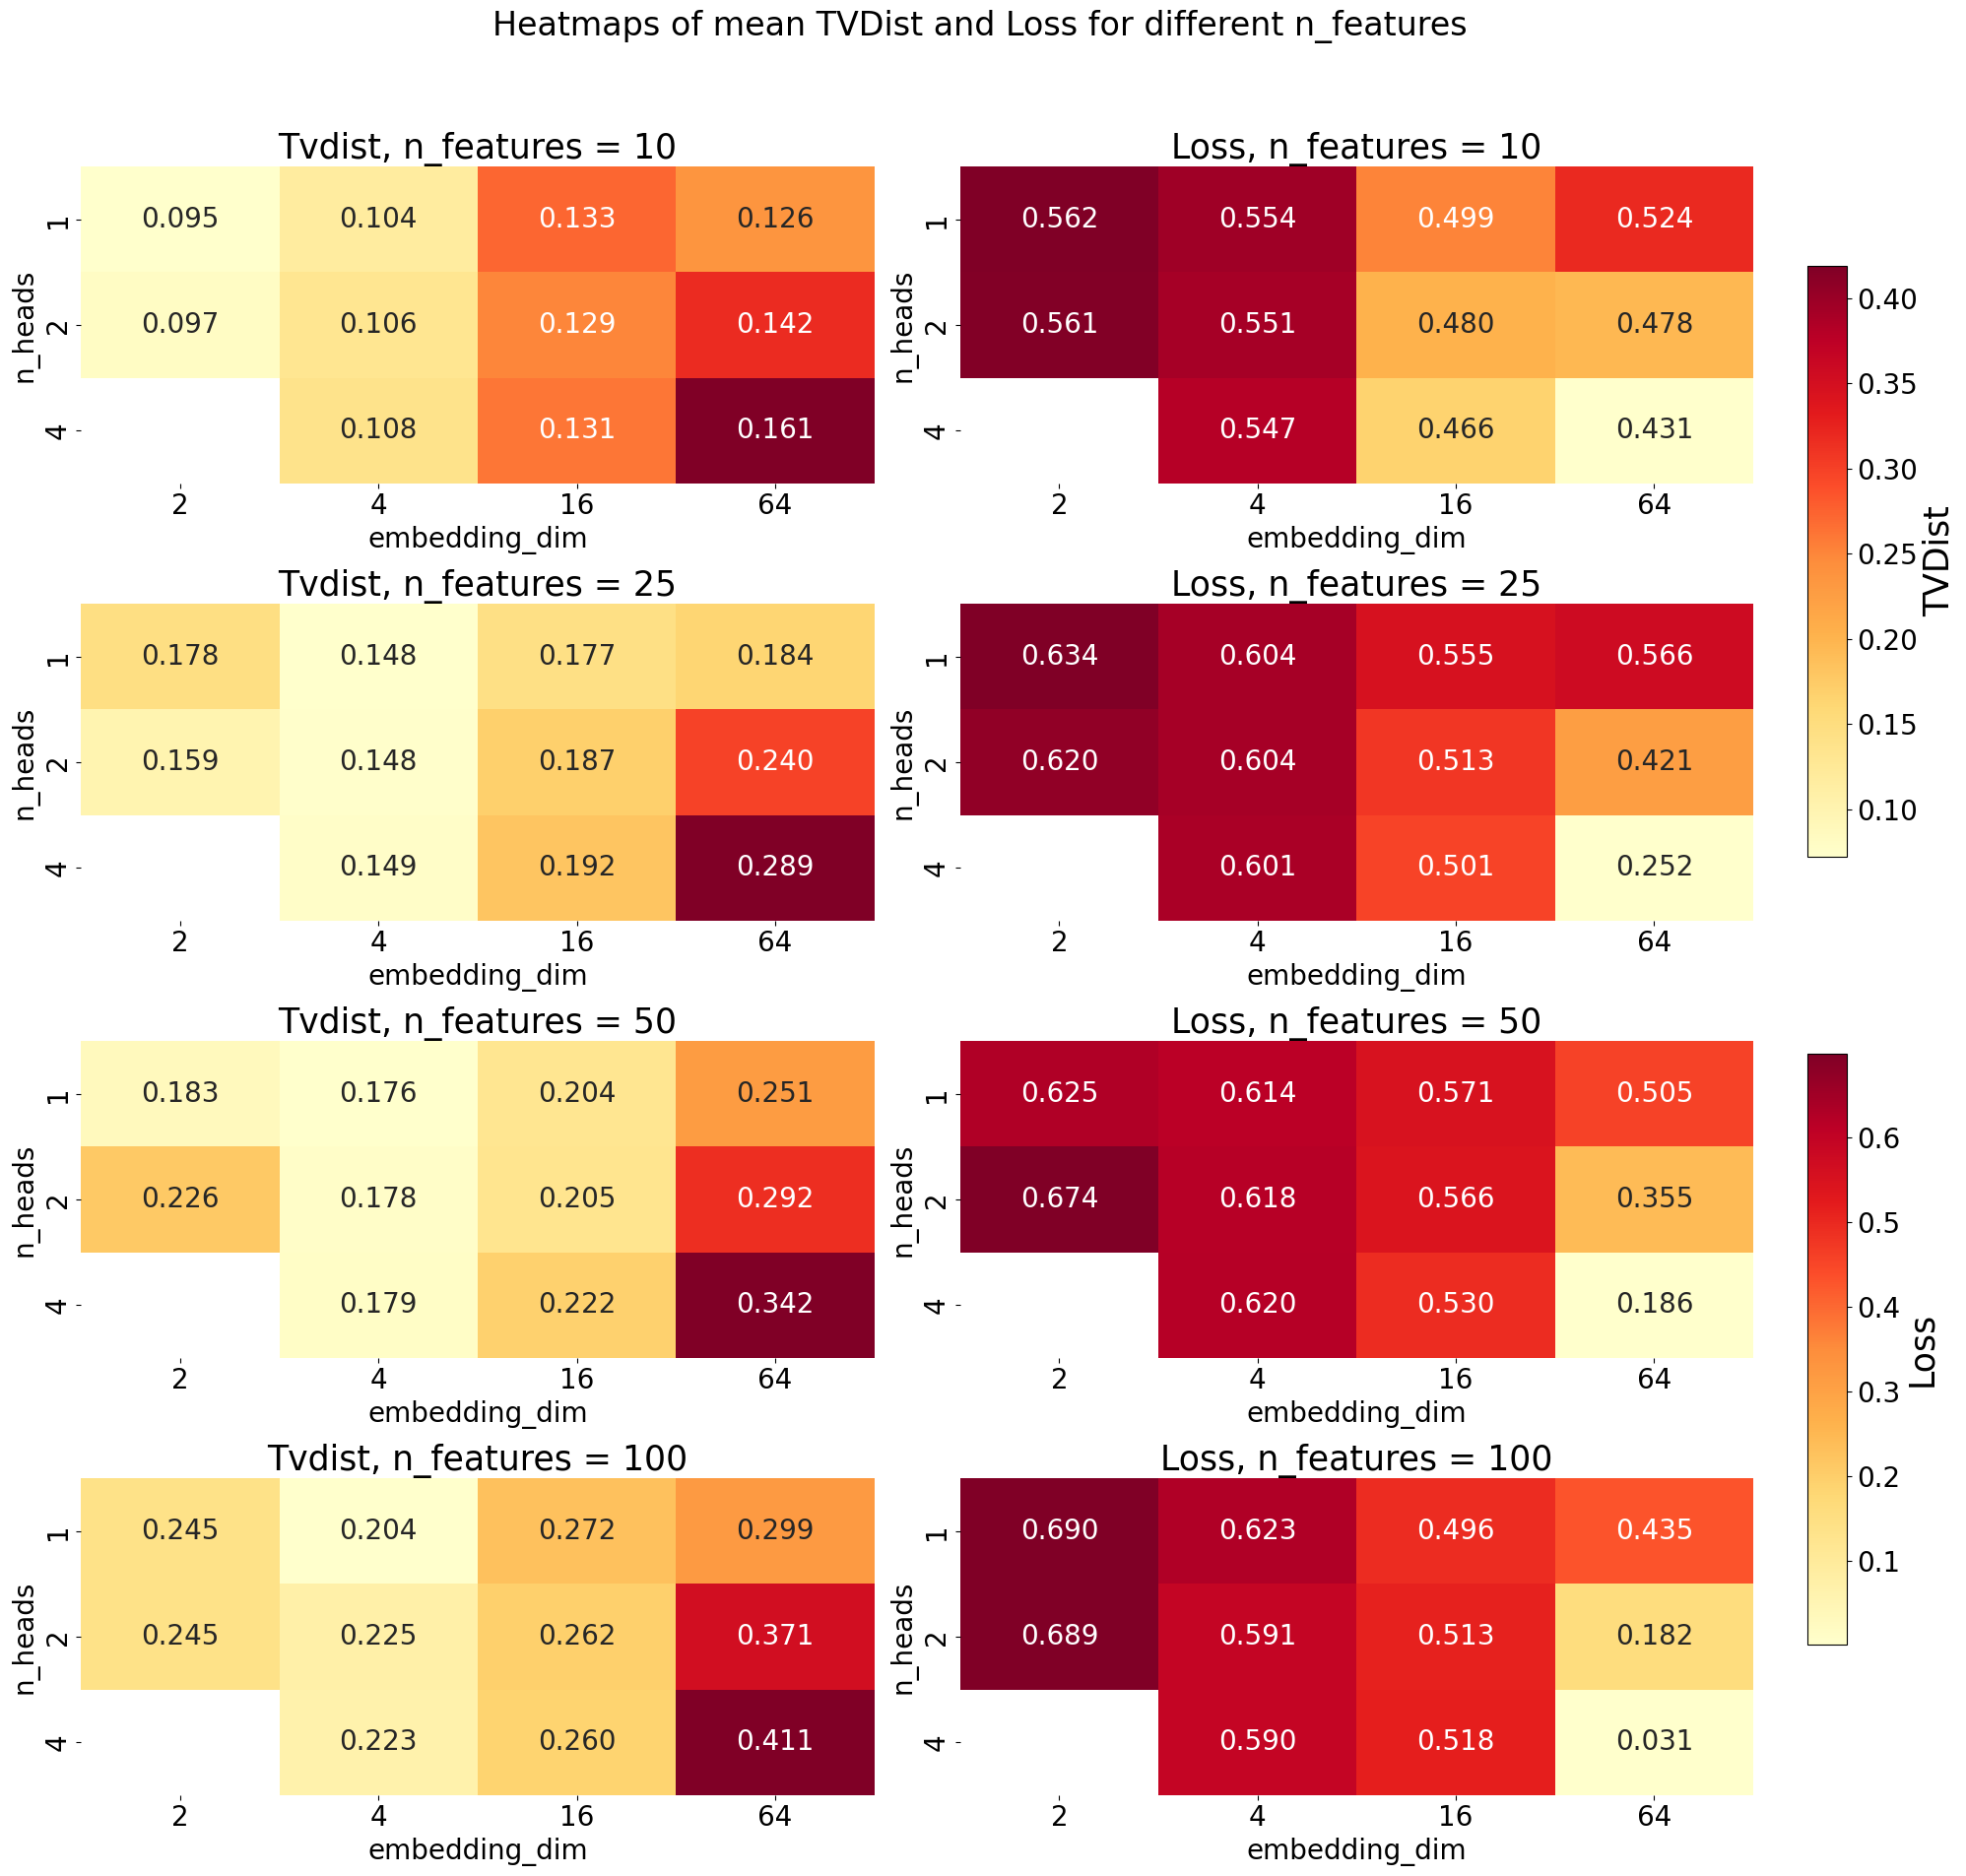

In [51]:
### Create Figure for Transformer with embeddings not Tied

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'result'
# If it's not, replace 'result' with your actual DataFrame name
fontsize=  25
def create_heatmap(data, ax, n_features, metric):
    pivot_data = data.pivot(index='n_heads', columns='embedding_dim', values=metric)
    sns.heatmap(pivot_data, ax=ax, cmap='YlOrRd', annot=True, fmt='.3f', cbar=False,
                annot_kws={'size': 20})  # Set font size for annotation
    ax.set_title(f'{metric.capitalize()}, n_features = {n_features}', fontsize=fontsize)
    ax.set_xlabel('embedding_dim', fontsize=20)
    ax.set_ylabel('n_heads', fontsize=20)
    ax.tick_params(labelsize=20)  # Set font size for tick labels

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('Heatmaps of mean TVDist and Loss for different n_features', fontsize=24)

n_features_values = [10, 25, 50, 100]

for i, n_features in enumerate(n_features_values):
    data = result[(result['aggregator'] == 'transformer') & 
                  (result['n_features'] == n_features) & 
                  (result['tie_embeddings'] == False) & 
                  (result['n_layers'] == 1)]
    
    grouped_data = data.groupby(['n_heads', 'embedding_dim', 'aggregator']).mean(['tvdist', 'loss']).reset_index()
    
    create_heatmap(grouped_data, axes[i, 0], n_features, 'tvdist')
    create_heatmap(grouped_data, axes[i, 1], n_features, 'loss')

# Find global min and max for consistent colorbar
vmin_tvdist = result['tvdist'].min()
vmax_tvdist = result['tvdist'].max()
vmin_loss = result['loss'].min()
vmax_loss = result['loss'].max()

# Add common colorbars
cbar_ax_tvdist = fig.add_axes([0.92, 0.55, 0.02, 0.3])
cbar_ax_loss = fig.add_axes([0.92, 0.15, 0.02, 0.3])

sm_tvdist = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_tvdist, vmax=vmax_tvdist))
sm_loss = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_loss, vmax=vmax_loss))

sm_tvdist.set_array([])
sm_loss.set_array([])

cbar_tvdist = fig.colorbar(sm_tvdist, cax=cbar_ax_tvdist)
cbar_loss = fig.colorbar(sm_loss, cax=cbar_ax_loss)

cbar_tvdist.set_label('TVDist', fontsize=fontsize)
cbar_loss.set_label('Loss', fontsize=fontsize)
cbar_tvdist.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks
cbar_loss.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])

# Add row labels for n_features
# for i, n_features in enumerate(n_features_values):
#     fig.text(0.08, 0.87 - i*0.22, f'n_features = {n_features}', fontsize=16, rotation=90, va='center')

plt.savefig('transformer_notie_heads_layer.pdf')

## MLP No Tie No Learn

/tmp/ipykernel_3610295/3177187225.py:61: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


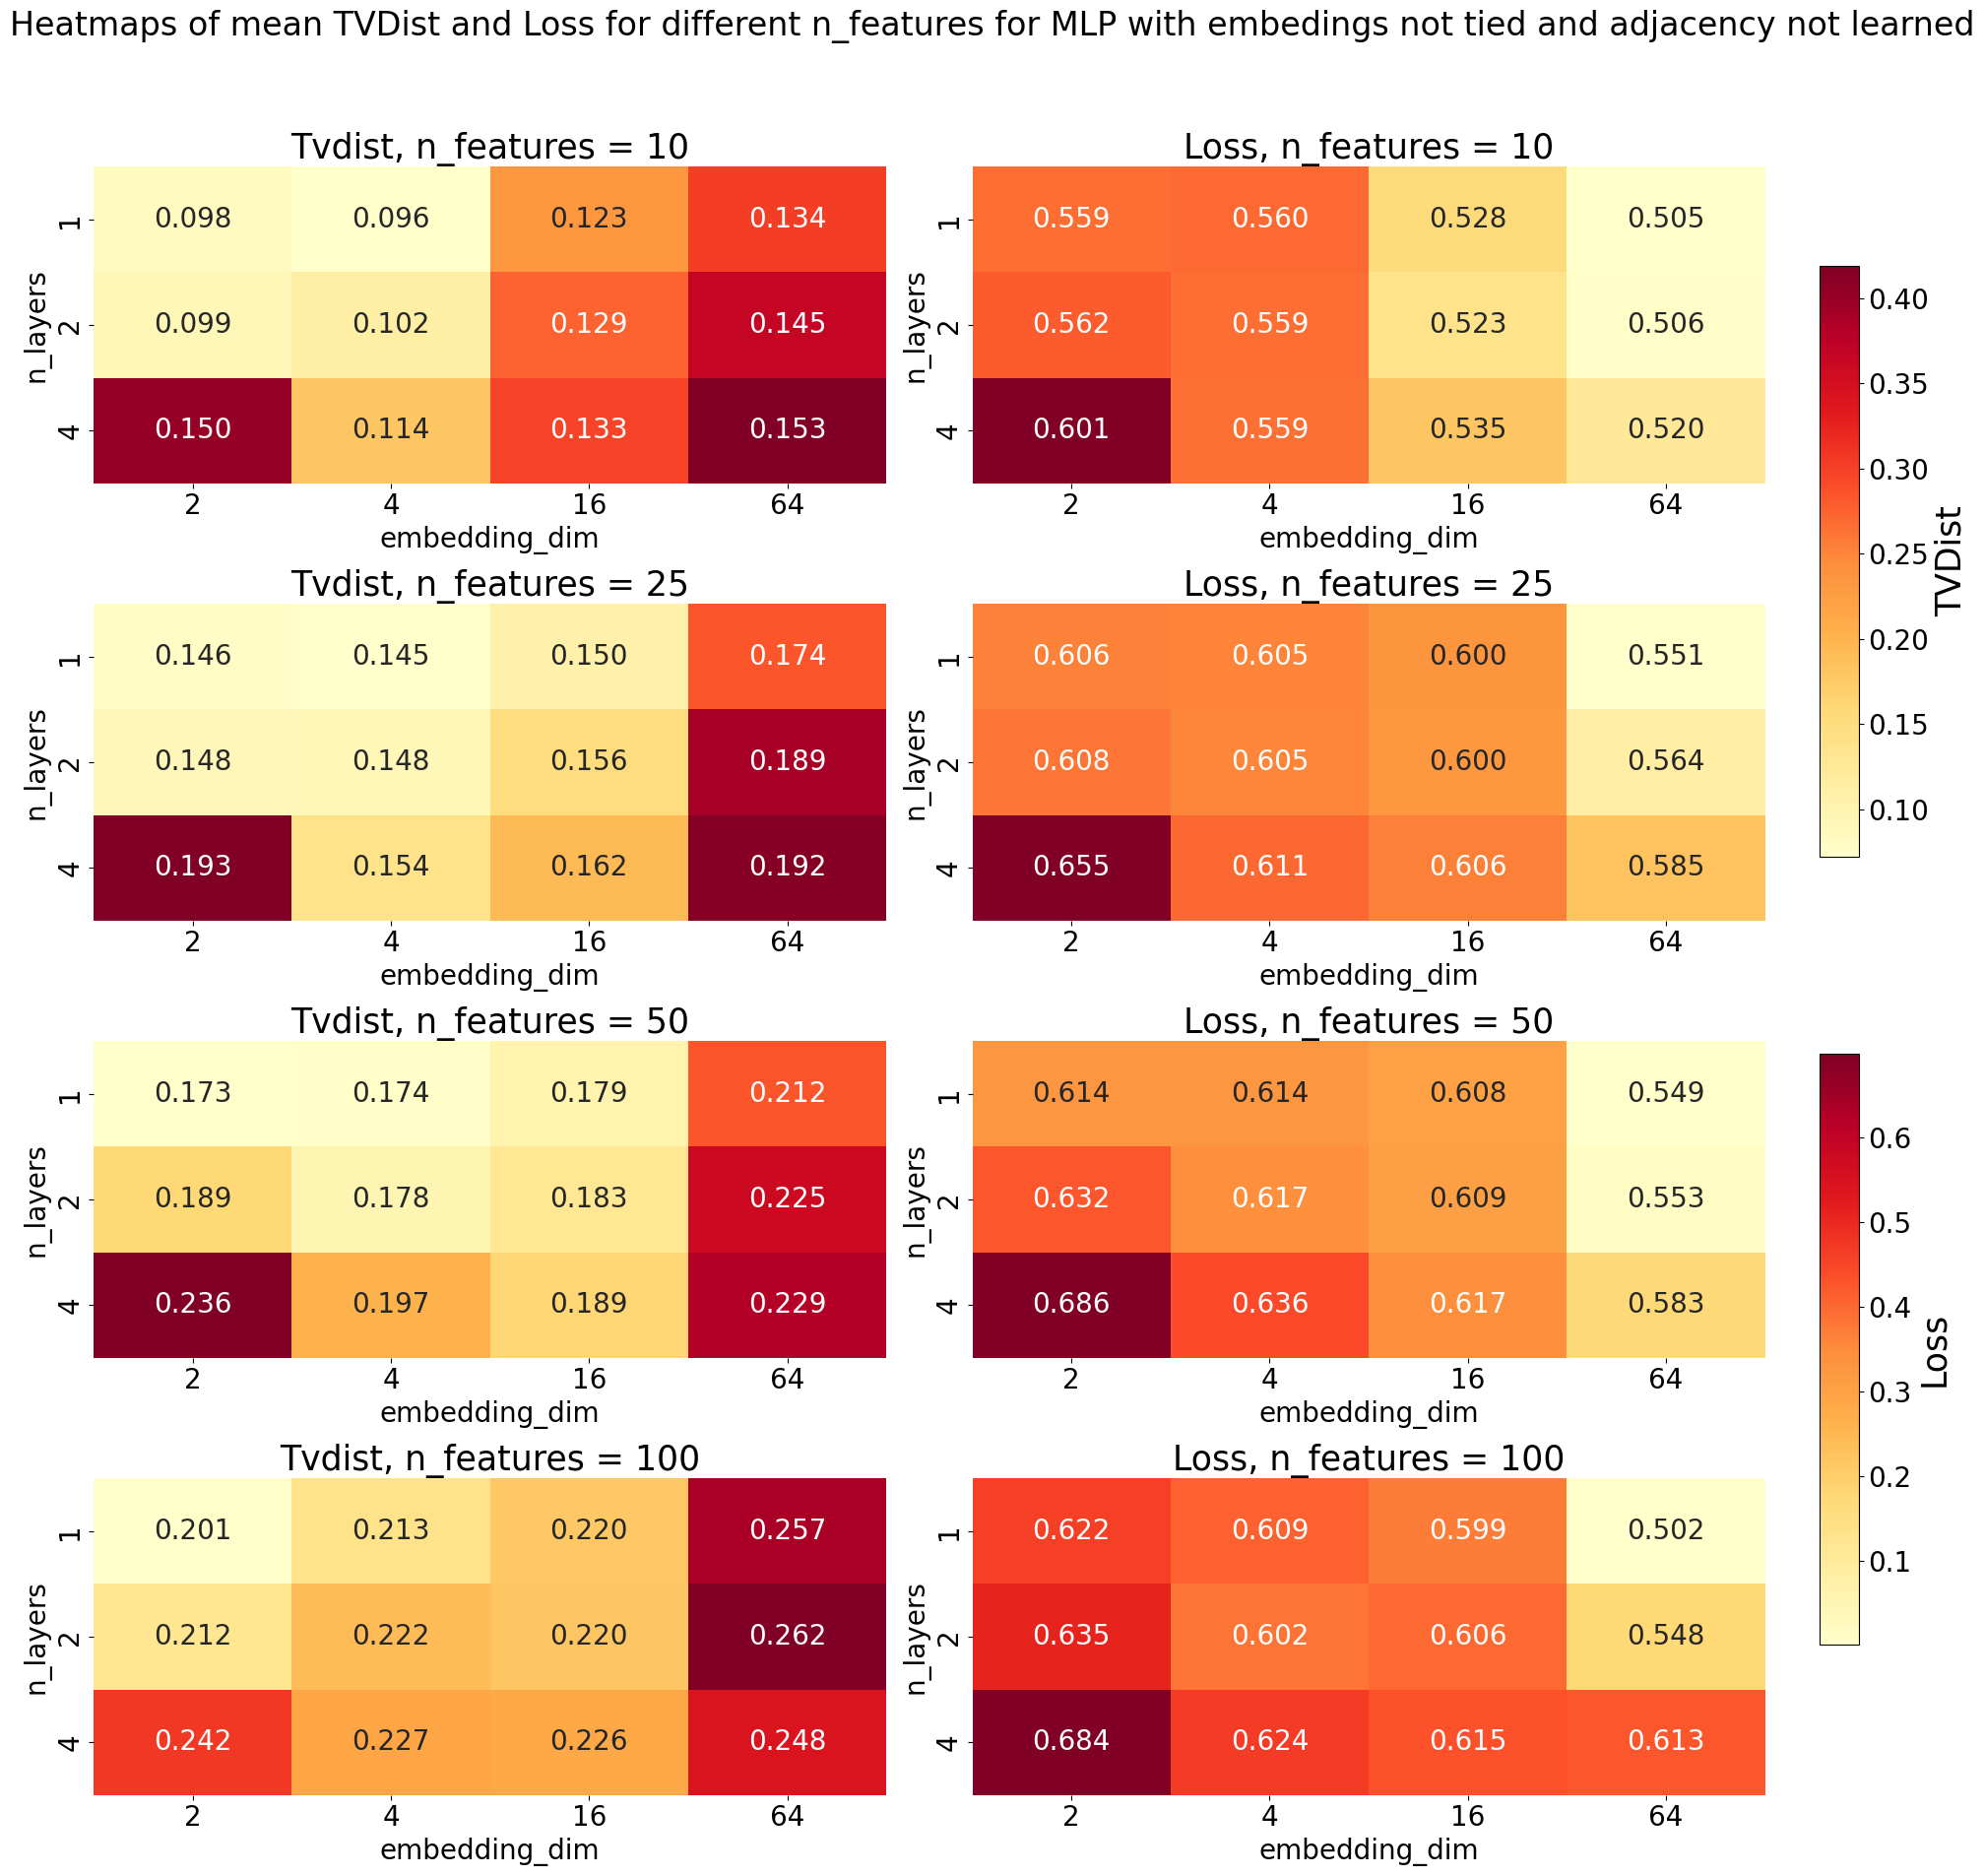

In [17]:
### Create Figure for Transformer with embeddings not Tied

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'result'
# If it's not, replace 'result' with your actual DataFrame name
fontsize=  25
def create_heatmap(data, ax, n_features, metric):
    pivot_data = data.pivot(index='n_layers', columns='embedding_dim', values=metric)
    sns.heatmap(pivot_data, ax=ax, cmap='YlOrRd', annot=True, fmt='.3f', cbar=False,
                annot_kws={'size': 20})  # Set font size for annotation
    ax.set_title(f'{metric.capitalize()}, n_features = {n_features}', fontsize=fontsize)
    ax.set_xlabel('embedding_dim', fontsize=20)
    ax.set_ylabel('n_layers', fontsize=20)
    ax.tick_params(labelsize=20)  # Set font size for tick labels

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('Heatmaps of mean TVDist and Loss for different n_features for MLP with embedings not tied and adjacency not learned', fontsize=24)

n_features_values = [10, 25, 50, 100]

for i, n_features in enumerate(n_features_values):
    data = result[(result['aggregator'] == 'mlp') & 
                  (result['n_features'] == n_features) & 
                  (result['tie_embeddings'] == False) & 
                  (result['n_heads'] == 1) &
                  (result['learn_adjacency'] == False)]
    
    grouped_data = data.groupby(['n_layers', 'embedding_dim', 'aggregator']).mean(['tvdist', 'loss']).reset_index()
    
    create_heatmap(grouped_data, axes[i, 0], n_features, 'tvdist')
    create_heatmap(grouped_data, axes[i, 1], n_features, 'loss')

# Find global min and max for consistent colorbar
vmin_tvdist = result['tvdist'].min()
vmax_tvdist = result['tvdist'].max()
vmin_loss = result['loss'].min()
vmax_loss = result['loss'].max()

# Add common colorbars
cbar_ax_tvdist = fig.add_axes([0.92, 0.55, 0.02, 0.3])
cbar_ax_loss = fig.add_axes([0.92, 0.15, 0.02, 0.3])

sm_tvdist = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_tvdist, vmax=vmax_tvdist))
sm_loss = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_loss, vmax=vmax_loss))

sm_tvdist.set_array([])
sm_loss.set_array([])

cbar_tvdist = fig.colorbar(sm_tvdist, cax=cbar_ax_tvdist)
cbar_loss = fig.colorbar(sm_loss, cax=cbar_ax_loss)

cbar_tvdist.set_label('TVDist', fontsize=fontsize)
cbar_loss.set_label('Loss', fontsize=fontsize)
cbar_tvdist.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks
cbar_loss.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])

# Add row labels for n_features
# for i, n_features in enumerate(n_features_values):
#     fig.text(0.08, 0.87 - i*0.22, f'n_features = {n_features}', fontsize=16, rotation=90, va='center')

plt.savefig('mlp_notie_nolearn.pdf')

/tmp/ipykernel_3610295/689599854.py:62: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


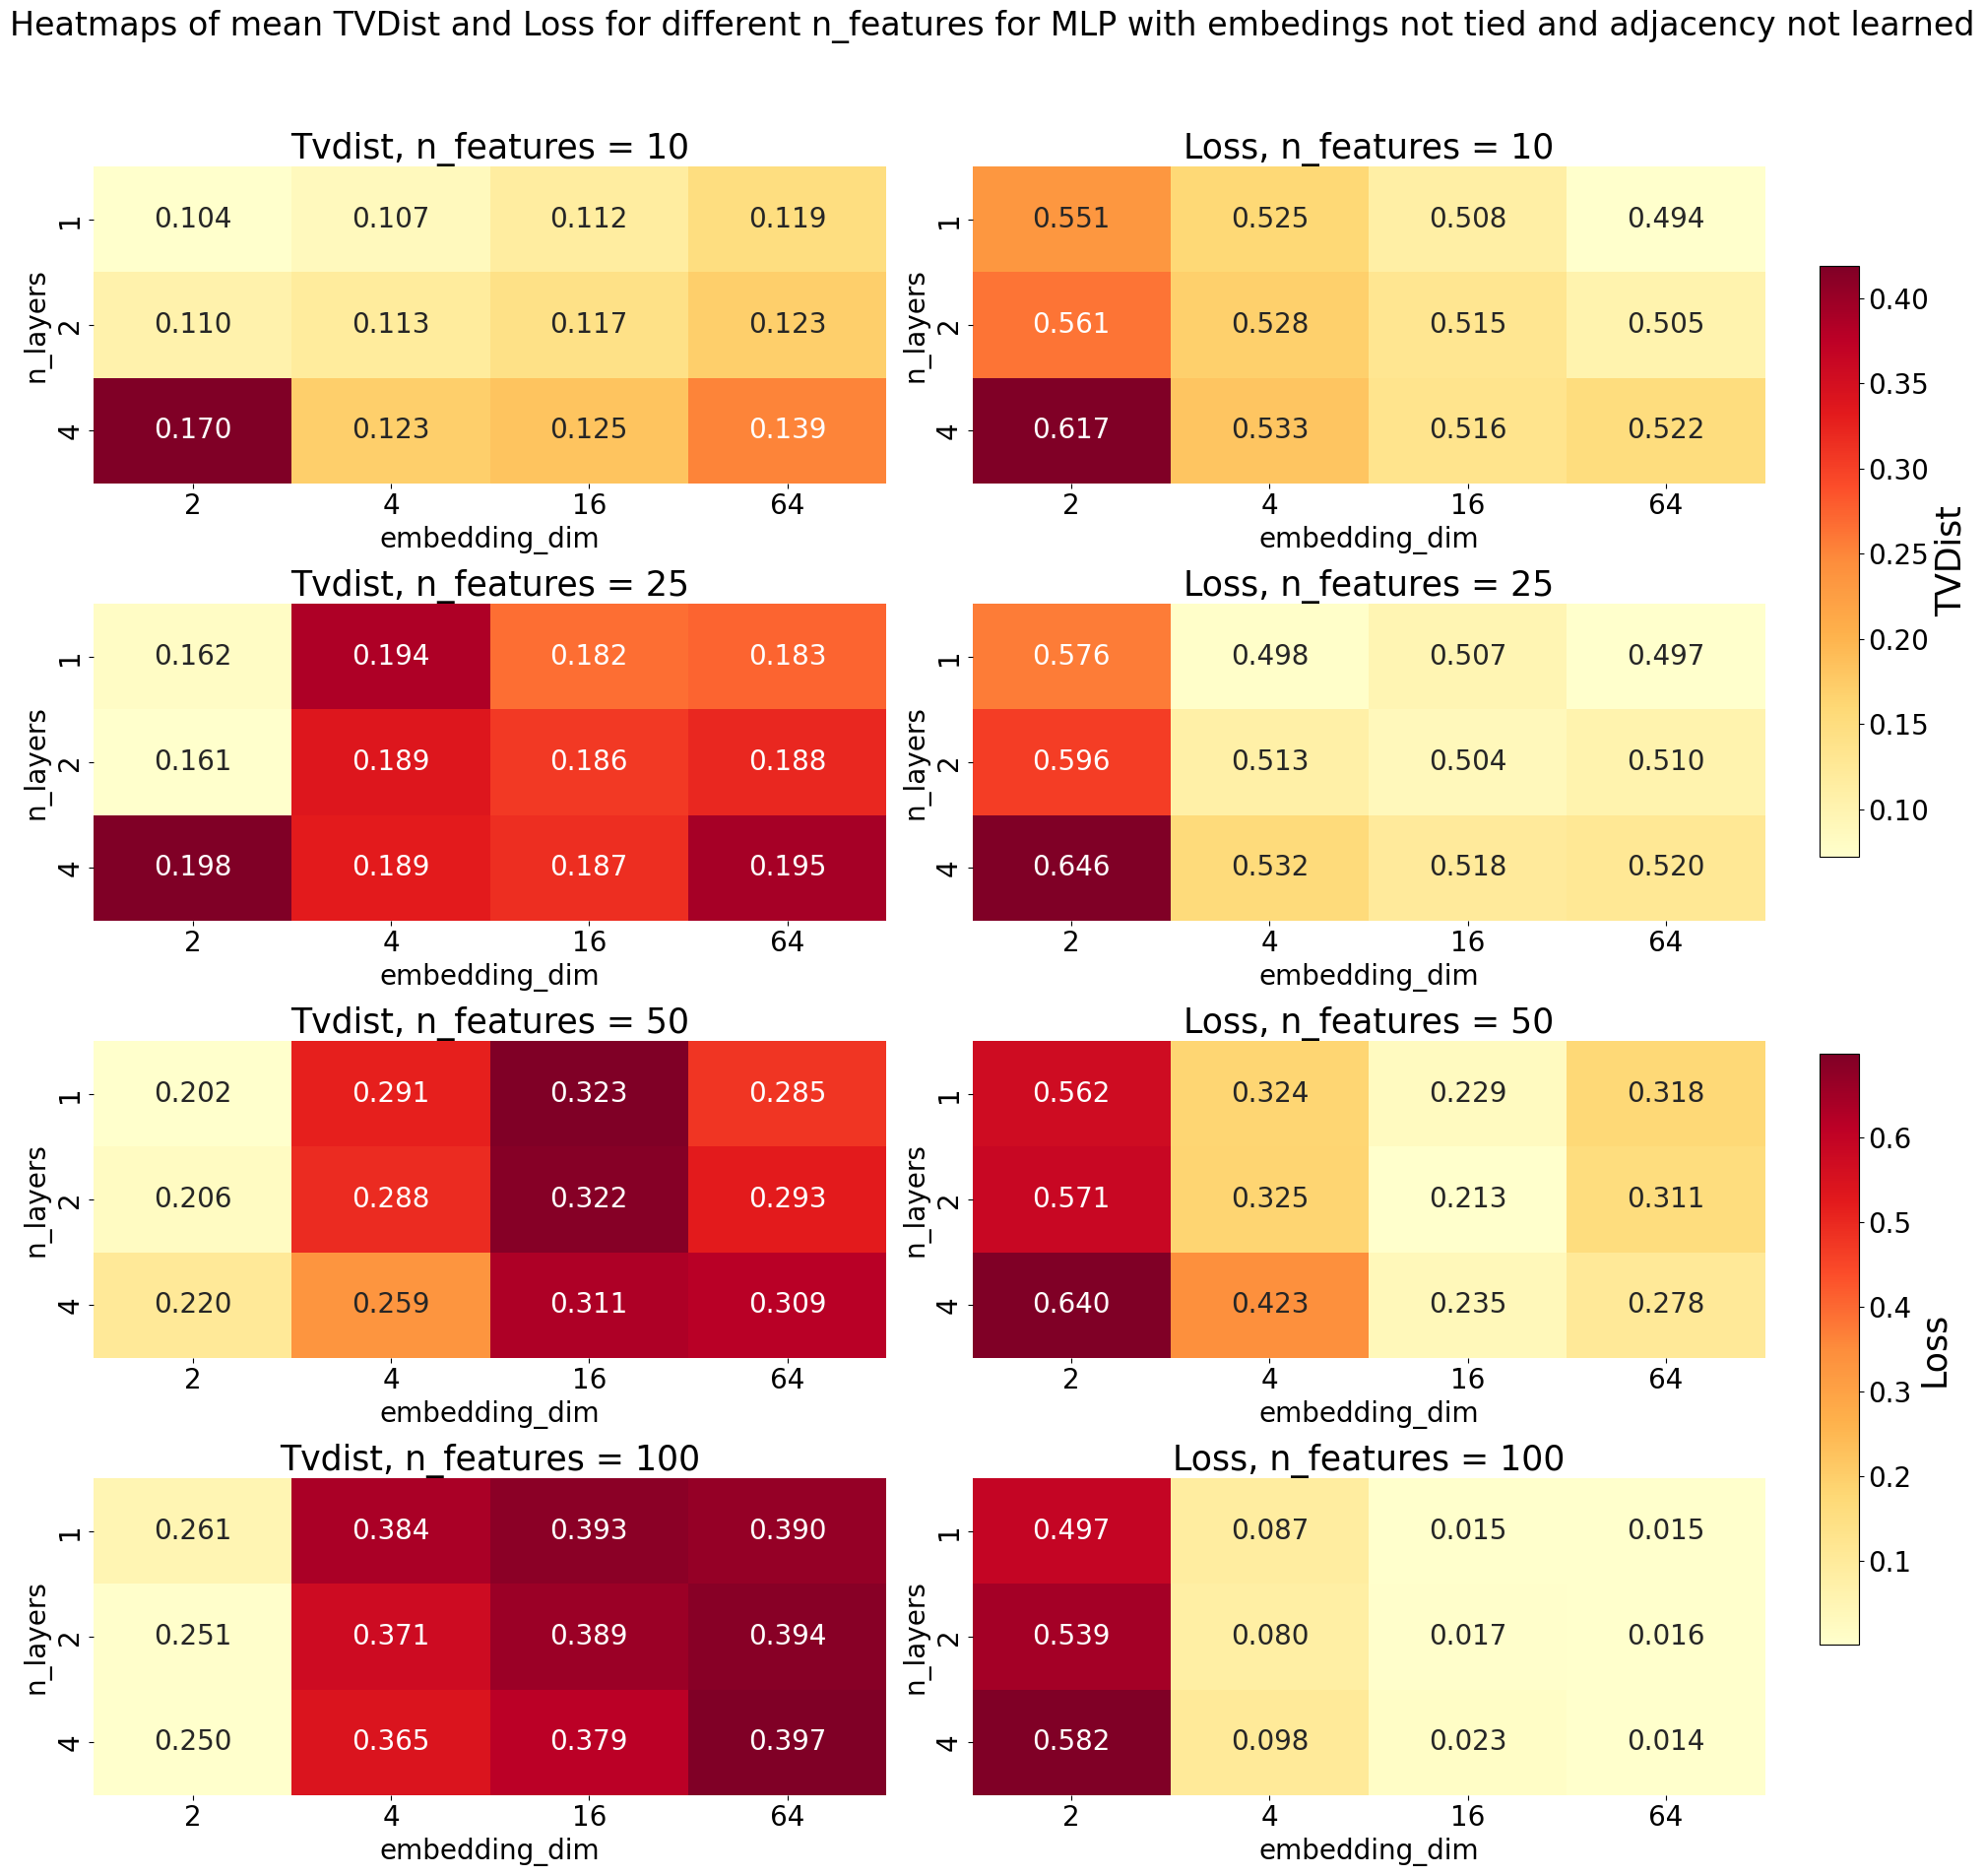

In [22]:
### Create Figure for Transformer with embeddings not Tied

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'result'
# If it's not, replace 'result' with your actual DataFrame name
fontsize=  25
def create_heatmap(data, ax, n_features, metric):
    pivot_data = data.pivot(index='n_layers', columns='embedding_dim', values=metric)
    sns.heatmap(pivot_data, ax=ax, cmap='YlOrRd', annot=True, fmt='.3f', cbar=False,
                annot_kws={'size': 20})  # Set font size for annotation
    ax.set_title(f'{metric.capitalize()}, n_features = {n_features}', fontsize=fontsize)
    ax.set_xlabel('embedding_dim', fontsize=20)
    ax.set_ylabel('n_layers', fontsize=20)
    ax.tick_params(labelsize=20)  # Set font size for tick labels

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('Heatmaps of mean TVDist and Loss for different n_features for MLP with embedings not tied and adjacency not learned', fontsize=24)

n_features_values = [10, 25, 50, 100]

for i, n_features in enumerate(n_features_values):
    data = result[(result['aggregator'] == 'mlp') & 
                  (result['n_features'] == n_features) & 
                  (result['tie_embeddings'] == False) & 
                  (result['n_heads'] == 1) &
                  (result['learn_adjacency'] == True) & 
                  (result['tie_aggregator'] == False)]
    
    grouped_data = data.groupby(['n_layers', 'embedding_dim', 'aggregator']).mean(['tvdist', 'loss']).reset_index()
    
    create_heatmap(grouped_data, axes[i, 0], n_features, 'tvdist')
    create_heatmap(grouped_data, axes[i, 1], n_features, 'loss')

# Find global min and max for consistent colorbar
vmin_tvdist = result['tvdist'].min()
vmax_tvdist = result['tvdist'].max()
vmin_loss = result['loss'].min()
vmax_loss = result['loss'].max()

# Add common colorbars
cbar_ax_tvdist = fig.add_axes([0.92, 0.55, 0.02, 0.3])
cbar_ax_loss = fig.add_axes([0.92, 0.15, 0.02, 0.3])

sm_tvdist = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_tvdist, vmax=vmax_tvdist))
sm_loss = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_loss, vmax=vmax_loss))

sm_tvdist.set_array([])
sm_loss.set_array([])

cbar_tvdist = fig.colorbar(sm_tvdist, cax=cbar_ax_tvdist)
cbar_loss = fig.colorbar(sm_loss, cax=cbar_ax_loss)

cbar_tvdist.set_label('TVDist', fontsize=fontsize)
cbar_loss.set_label('Loss', fontsize=fontsize)
cbar_tvdist.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks
cbar_loss.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])

# Add row labels for n_features
# for i, n_features in enumerate(n_features_values):
#     fig.text(0.08, 0.87 - i*0.22, f'n_features = {n_features}', fontsize=16, rotation=90, va='center')

plt.savefig('mlp_notie_learn.pdf')

## MLP adjacency learned vs no learned

/tmp/ipykernel_3610295/1352707949.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


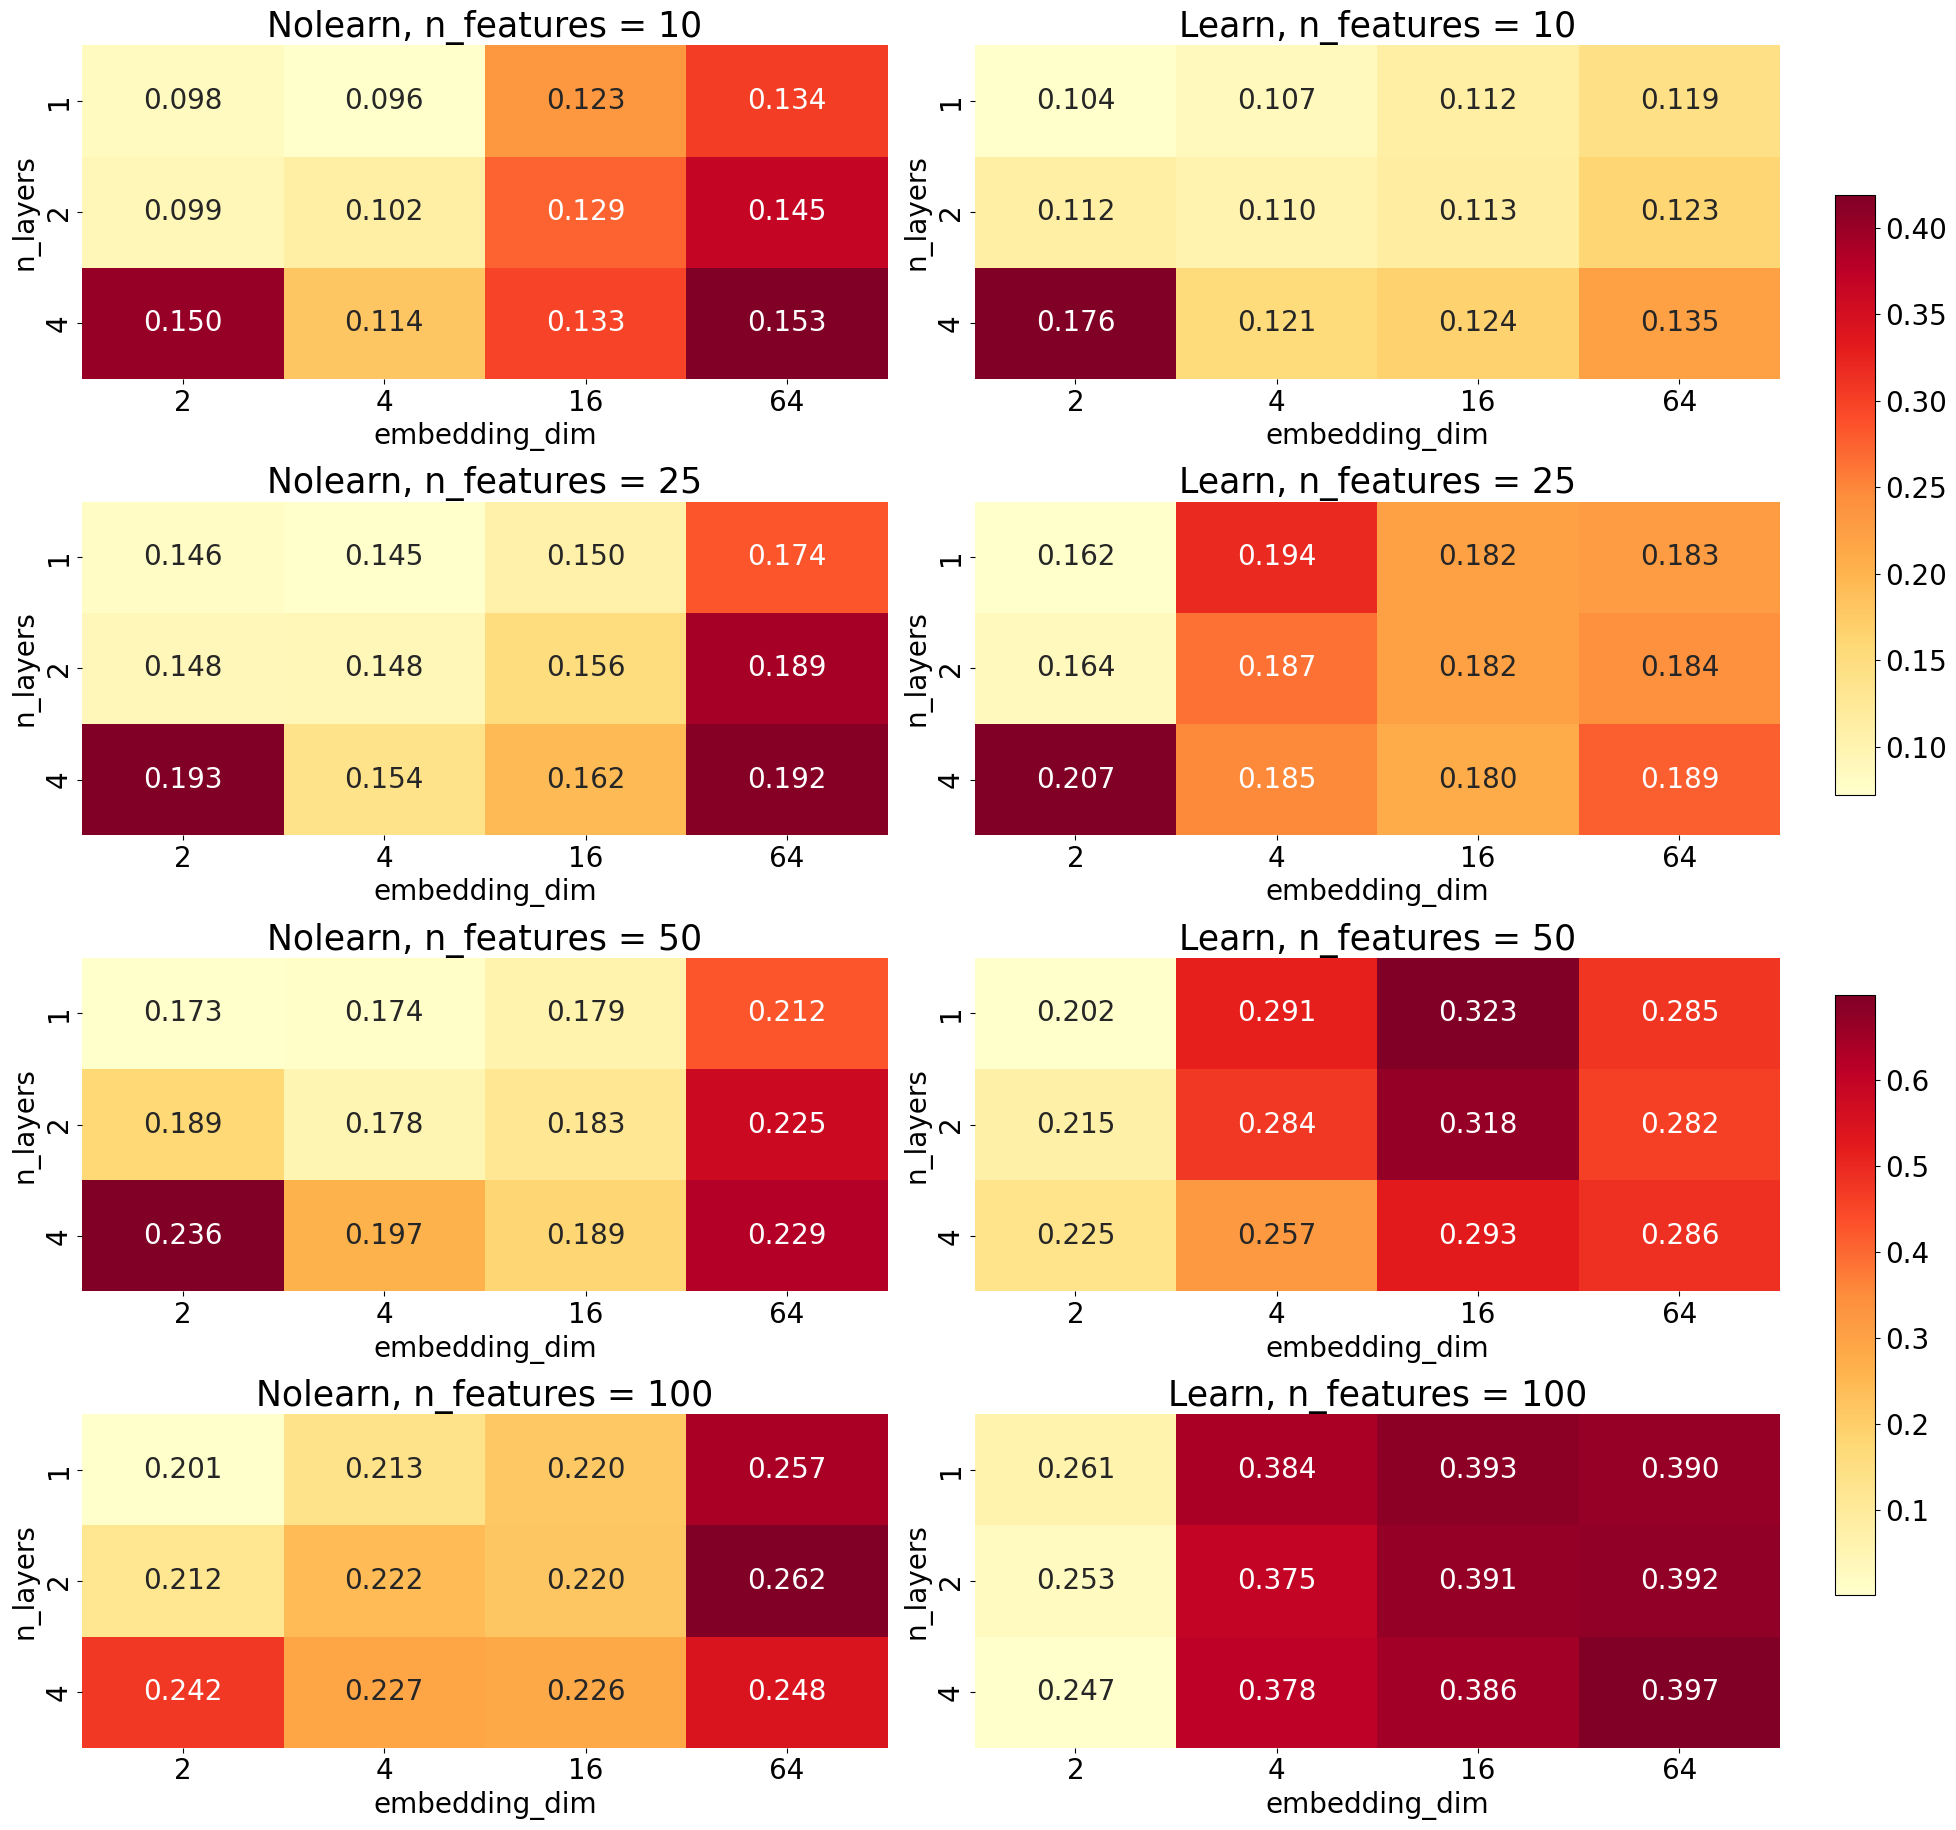

In [21]:
### Create Figure for Transformer with embeddings not Tied

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'result'
# If it's not, replace 'result' with your actual DataFrame name
fontsize=  25
def create_heatmap(data, ax, n_features, metric, show):
    pivot_data = data.pivot(index='n_layers', columns='embedding_dim', values=metric)
    sns.heatmap(pivot_data, ax=ax, cmap='YlOrRd', annot=True, fmt='.3f', cbar=False,
                annot_kws={'size': 20})  # Set font size for annotation
    ax.set_title(f'{show.capitalize()}, n_features = {n_features}', fontsize=fontsize)
    ax.set_xlabel('embedding_dim', fontsize=20)
    ax.set_ylabel('n_layers', fontsize=20)
    ax.tick_params(labelsize=20)  # Set font size for tick labels

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
# fig.suptitle('Heatmaps of mean TVDist and Loss for different n_features for MLP with embedings not tied and adjacency not learned', fontsize=24)

n_features_values = [10, 25, 50, 100]

for i, n_features in enumerate(n_features_values):
    data = result[(result['aggregator'] == 'mlp') & 
                  (result['n_features'] == n_features) & 
                  (result['tie_embeddings'] == False) & 
                  (result['n_heads'] == 1) &
                  (result['learn_adjacency'] == False) ]
    
    grouped_data = data.groupby(['n_layers', 'embedding_dim', 'aggregator']).mean(['tvdist']).reset_index()
    
    create_heatmap(grouped_data, axes[i, 0], n_features, 'tvdist', 'nolearn')

    data = result[(result['aggregator'] == 'mlp') & 
                  (result['n_features'] == n_features) & 
                  (result['tie_embeddings'] == False) & 
                  (result['n_heads'] == 1) &
                  (result['learn_adjacency'] == True) ]
    
    grouped_data = data.groupby(['n_layers', 'embedding_dim', 'aggregator']).mean(['tvdist']).reset_index()

    create_heatmap(grouped_data, axes[i, 1], n_features, 'tvdist', 'learn')

# Find global min and max for consistent colorbar
vmin_tvdist = result['tvdist'].min()
vmax_tvdist = result['tvdist'].max()

# Add common colorbars
cbar_ax_tvdist = fig.add_axes([0.92, 0.55, 0.02, 0.3])
cbar_ax_loss = fig.add_axes([0.92, 0.15, 0.02, 0.3])

sm_tvdist = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_tvdist, vmax=vmax_tvdist))
sm_loss = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_loss, vmax=vmax_loss))

sm_tvdist.set_array([])
sm_loss.set_array([])

cbar_tvdist = fig.colorbar(sm_tvdist, cax=cbar_ax_tvdist)
cbar_loss = fig.colorbar(sm_loss, cax=cbar_ax_loss)

# cbar_tvdist.set_label('TVDist', fontsize=fontsize)
# cbar_loss.set_label('Loss', fontsize=fontsize)
cbar_tvdist.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks
cbar_loss.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])

# Add row labels for n_features
# for i, n_features in enumerate(n_features_values):
#     fig.text(0.08, 0.87 - i*0.22, f'n_features = {n_features}', fontsize=16, rotation=90, va='center')

plt.savefig('mlp_notie_learn_vs_nolearn.pdf')

In [ ]:
## now n_layers = 1, y axis n_features 

/tmp/ipykernel_3610295/1183245999.py:72: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])


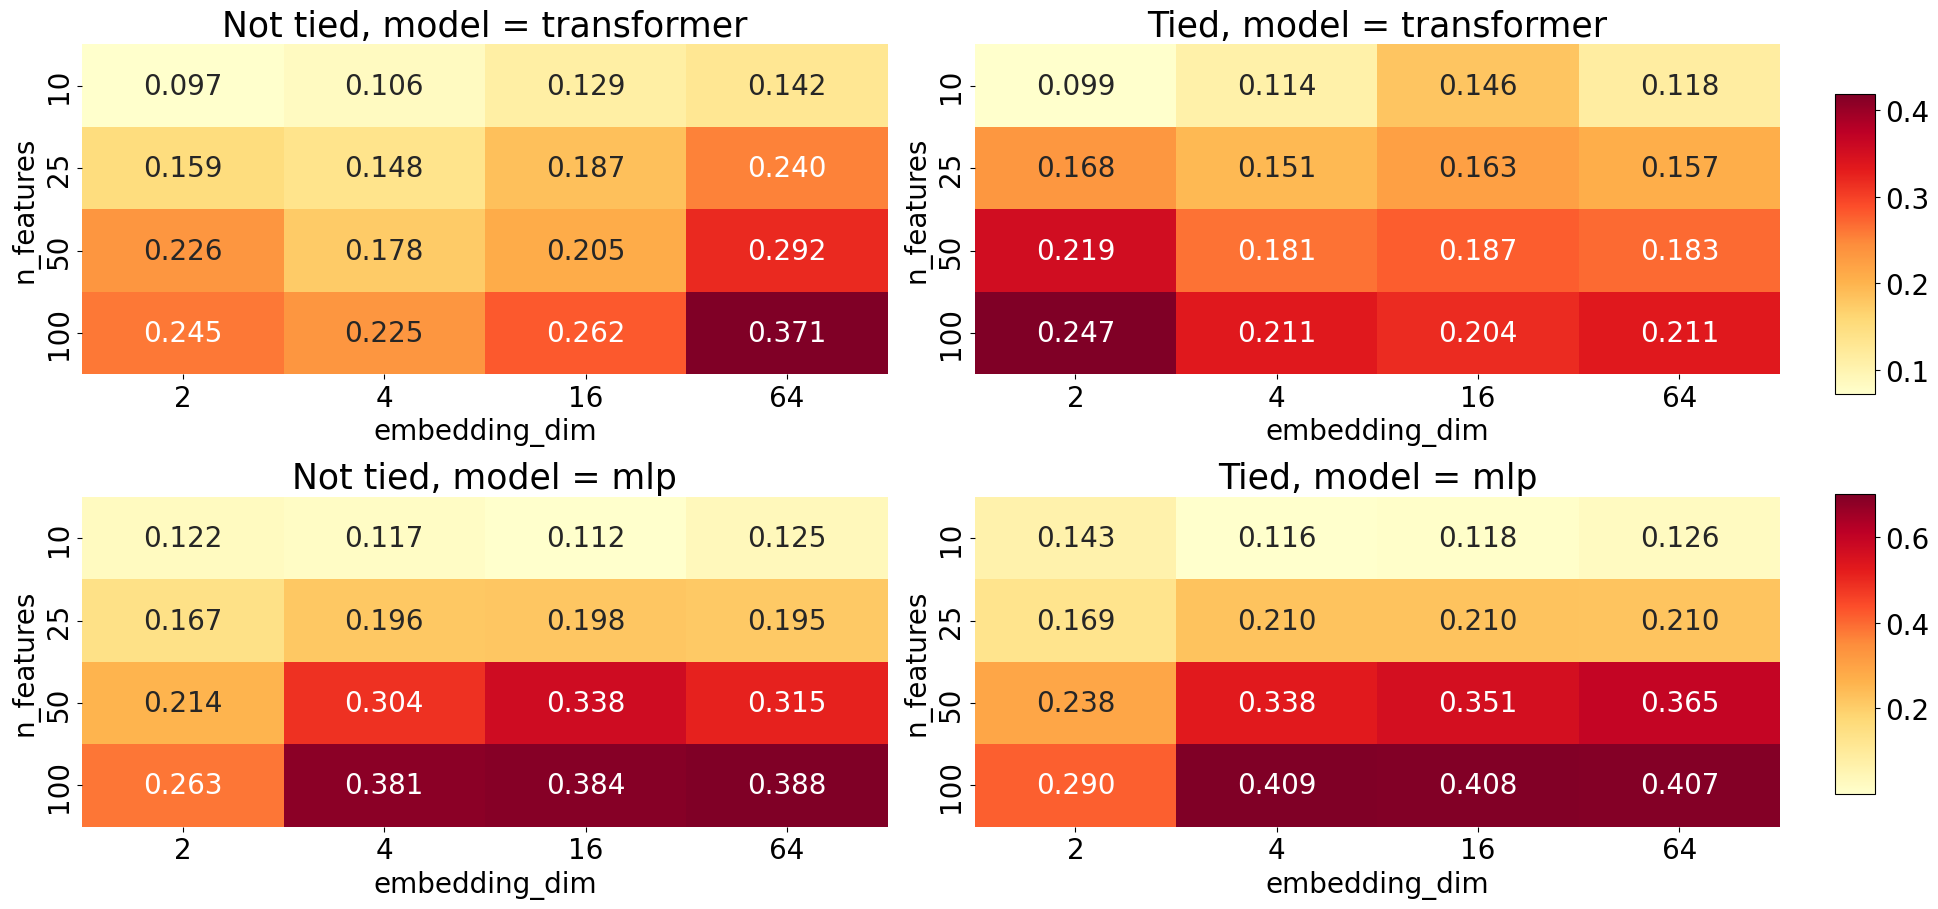

In [134]:
### Create Figure for Transformer with embeddings not Tied

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'result'
# If it's not, replace 'result' with your actual DataFrame name
fontsize=  25
def create_heatmap(data, ax, model, metric, show):
    pivot_data = data.pivot(index='n_features', columns='embedding_dim', values=metric)
    sns.heatmap(pivot_data, ax=ax, cmap='YlOrRd', annot=True, fmt='.3f', cbar=False,
                annot_kws={'size': 20})  # Set font size for annotation
    ax.set_title(f'{show.capitalize()}, model = {model}', fontsize=fontsize)
    ax.set_xlabel('embedding_dim', fontsize=20)
    ax.set_ylabel('n_features', fontsize=20)
    ax.tick_params(labelsize=20)  # Set font size for tick labels

# Create a 4x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
# fig.suptitle('Heatmaps of mean TVDist and Loss for different n_features for MLP with embedings not tied and adjacency not learned', fontsize=24)

n_features_values = [10, 25, 50, 100]
conditions_values = [('aggregator', 'transformer'), ('aggregator', 'mlp')]
for i, (condition, value) in enumerate(conditions_values):
    data = result[(result[condition] == value) &
                  (result['tie_embeddings'] == False) & 
                  (result['n_heads'] == 2) &
                  (result['n_layers'] == 2)]
    if (value == 'mlp'):
        data = data[data['learn_adjacency'] == False]
        # data = data[data['tie_aggregator'] == True]
    
    grouped_data = data.groupby(['n_features', 'embedding_dim']).mean(['tvdist']).reset_index()
    
    create_heatmap(grouped_data, axes[i, 0], value, 'tvdist', 'not tied')

    data = result[(result[condition]==value) &
                  (result['tie_embeddings'] == True) & 
                  (result['n_heads'] == 2) &
                  (result['n_layers'] == 2)]
    if (value == 'mlp'):
        data = data[data['learn_adjacency'] == False]
        # data = data[data['tie_aggregator'] == True]
    
    grouped_data = data.groupby(['n_features', 'embedding_dim']).mean(['tvdist']).reset_index()

    create_heatmap(grouped_data, axes[i, 1], value, 'tvdist', 'tied')

# Find global min and max for consistent colorbar
vmin_tvdist = result['tvdist'].min()
vmax_tvdist = result['tvdist'].max()

# Add common colorbars
cbar_ax_tvdist = fig.add_axes([0.92, 0.55, 0.02, 0.3])
cbar_ax_loss = fig.add_axes([0.92, 0.15, 0.02, 0.3])

sm_tvdist = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_tvdist, vmax=vmax_tvdist))
sm_loss = plt.cm.ScalarMappable(cmap='YlOrRd', norm=plt.Normalize(vmin=vmin_loss, vmax=vmax_loss))

sm_tvdist.set_array([])
sm_loss.set_array([])

cbar_tvdist = fig.colorbar(sm_tvdist, cax=cbar_ax_tvdist)
cbar_loss = fig.colorbar(sm_loss, cax=cbar_ax_loss)

# cbar_tvdist.set_label('TVDist', fontsize=fontsize)
# cbar_loss.set_label('Loss', fontsize=fontsize)
cbar_tvdist.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks
cbar_loss.ax.tick_params(labelsize=20)  # Set font size for colorbar ticks

plt.tight_layout(rect=[0, 0.03, 0.9, 0.95])

# Add row labels for n_features
# for i, n_features in enumerate(n_features_values):
#     fig.text(0.08, 0.87 - i*0.22, f'n_features = {n_features}', fontsize=16, rotation=90, va='center')

plt.savefig('mlp_vs_transformer_tie_notie_layers_2.pdf')

In [71]:
configs_ = configs[['datapath', 'n_features', 'size_of_cpt', 'num_edges']]
configs_ = configs_.drop_duplicates()
# configs_.groupby(['datapath'])

In [74]:
configs_.to_latex('datas_stats.tex', index=False)

In [125]:
configs_ = configs[(configs['aggregator']=='mlp') & 
                   (configs['n_heads']==4) &
                   (configs['tie_embeddings'] == True) & 
                   (configs['learn_adjacency'] == True) &
                   (configs['tie_aggregator'] == False) &
                   (configs['n_layers']==4)]
configs_ = configs_[['n_features', 'numparams', 'embedding_dim']]
configs_ = configs_.drop_duplicates()
configs_ = configs_.pivot(index = 'n_features', columns = ['embedding_dim'], values = 'numparams')
# configs_ = configs_.sort_values
print(configs_.to_latex())

\begin{tabular}{lrrr}
\toprule
embedding_dim & 4 & 16 & 64 \\
n_features &  &  &  \\
\midrule
10 & 1884 & 4272 & 36864 \\
25 & 10344 & 12912 & 46224 \\
50 & 40444 & 43312 & 77824 \\
100 & 160644 & 164112 & 201024 \\
\bottomrule
\end{tabular}

